In [82]:


histopathology (histo): 조직병리학적 검사를 통해 확인된 진단
follow-up examination (follow_up): 추적 검사를 통해 확인된 진단
expert consensus (consensus): 전문가 합의를 통해 확인된 진단
confirmation by in-vivo confocal microscopy (confocal): 인체 내 현미경을 사용하여 확인된 진단

dx는 진단(diagnosis)을 의미
"dx":

(nv)    Melanocytic nevi (흑색종)                  멜라닌세포모반은 모반세포(점세포, nevus cell, nevomelanocyte)로 이루어진 양성 종양
(mel)   Melanoma (흑색종)                          악성 흑색종은 멜라닌 생성 세포로 구성된 피부 악성 신생물(암)
(bkl)   Benign keratosis-like lesions (양성 각화 유사 병변) 
(bcc)   Basal cell carcinoma (기저세포암)           기저세포 암종은 표피 및 그 부속기 기저부의 비각질화 세포에서 유래한 악성 종양
(akiec) Actinic keratoses (광선각화증)              광선 각화증이란 지속적인 햇빛 노출에 의해 피부에 인설이 동반된 분홍색 또는 적색의 반점이나 구진이 생기는 피부 병변
(vasc)  Vascular lesions (혈관병변)                 피부나 점막에 발생하는 혈관 관련 이상
(df)    Dermatofibroma (피부섬유종)                  진피의 섬유성 종양 모양의 결절.

dx_type은 진단의 유형을 나타냅니다. 각 진단이 어떻게 확인되었는지를 나타냅니다.
"dx_type":

(histo)      histo: 조직 검사 결과를 기반으로 한 진단                                            histopathological(조직학적)
(follow_up)  follow-up examination : 진단 후 추적 관찰                                         follow-up(후행, 추적)
(consensus)  expert consensus: 전문가 그룹의 의견을 바탕으로 한 합의 진단                         consensus(합의)
(confocal)   confirmation by in-vivo confocal microscopy : 조직 검사 대신 피부 조절 현미경 사용  confocal(공초점의)

SyntaxError: illegal target for annotation (44819377.py, line 1)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
#for dirname, _, filenames in os.walk('./archive'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [3]:
dict_dx_dx_type = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

dict_dx = {
    'nv': 0,
    'mel': 1,
    'bkl': 2,
    'bcc': 3,
    'akiec': 4,
    'vasc': 5,
    'df': 6
}

dict_localization = {
    'back':0,
    'lower extremity':1,
    'trunk':2,
    'upper extremity':3, 
    'abdomen':4,
    'face':5,
    'chest':6,
    'foot':7,
    'unknown':8,
    'neck':9,
    'scalp':10,
    'hand':11,
    'ear':12,
    'genital':13,
    'acral':14
}
dict_sex =  {
    'male':0,
    'female':1,
    'unknown':2
}



In [4]:
metadata_df = pd.read_csv('./archive/HAM10000_metadata.csv', delimiter=',')
hmnist_28_28_RGB_df = pd.read_csv('./archive/hmnist_28_28_RGB.csv', delimiter=',')

In [5]:
# 결측값이 있는 행을 추출
null_age_df = metadata_df[metadata_df['age'].isnull()]
null_age_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
968,HAM_0001186,ISIC_0033391,bkl,consensus,NaN,unknown,unknown
969,HAM_0002660,ISIC_0033750,bkl,consensus,NaN,unknown,unknown
970,HAM_0000372,ISIC_0033685,bkl,consensus,NaN,unknown,unknown
971,HAM_0000948,ISIC_0033631,bkl,consensus,NaN,unknown,unknown
972,HAM_0000983,ISIC_0033490,bkl,consensus,NaN,unknown,unknown
973,HAM_0007281,ISIC_0034283,bkl,consensus,NaN,unknown,unknown
974,HAM_0001561,ISIC_0032740,bkl,consensus,NaN,unknown,unknown
975,HAM_0000825,ISIC_0034186,bkl,consensus,NaN,unknown,unknown
977,HAM_0006074,ISIC_0034252,bkl,consensus,NaN,unknown,unknown
978,HAM_0006074,ISIC_0033829,bkl,consensus,NaN,unknown,unknown


In [6]:
# 'age' column의 결측값을 평균으로 채우기
mean_age = metadata_df['age'].mean()
metadata_df['age'].fillna(mean_age, inplace=True)

null_age_df = metadata_df[metadata_df['age'].isnull()]
null_age_df

,lesion_id,image_id,dx,dx_type,age,sex,localization


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 'age' column을 0과 1 사이의 값으로 정규화
metadata_df['age_normalized'] = scaler.fit_transform(metadata_df['age'].values.reshape(-1, 1))

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

one_hot_encoder_sex = OneHotEncoder()
one_hot_encoder_local = OneHotEncoder()
label_encoder = LabelEncoder()


# 'sex', 'localization' column을 2차원 배열로 변환
sex_data = metadata_df['sex'].values.reshape(-1, 1)
localization_data = metadata_df['localization'].values.reshape(-1, 1)

# 원핫 인코딩 수행
sex_encoded = one_hot_encoder_sex.fit_transform(sex_data)
localization_encoded = one_hot_encoder_local.fit_transform(localization_data)

# 인코딩 결과를 데이터프레임으로 변환
sex_columns = one_hot_encoder_sex.get_feature_names_out(['sex'])
metadata_df[sex_columns] = pd.DataFrame(sex_encoded.toarray(), columns=sex_columns)

localization_columns = one_hot_encoder_local.get_feature_names_out(['localization'])
metadata_df[localization_columns] = pd.DataFrame(localization_encoded.toarray(), columns=localization_columns)

In [9]:
metadata_df 

,lesion_id,image_id,dx,dx_type,age,sex,localization,age_normalized,sex_female,sex_male,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,0.941176,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,0.941176,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,0.941176,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,0.941176,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,0.882353,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,0.470588,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,0.470588,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,0.470588,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,0.941176,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
metadata_df.isnull().sum()

lesion_id                       0
image_id                        0
dx                              0
dx_type                         0
age                             0
sex                             0
localization                    0
age_normalized                  0
sex_female                      0
sex_male                        0
sex_unknown                     0
localization_abdomen            0
localization_acral              0
localization_back               0
localization_chest              0
localization_ear                0
localization_face               0
localization_foot               0
localization_genital            0
localization_hand               0
localization_lower extremity    0
localization_neck               0
localization_scalp              0
localization_trunk              0
localization_unknown            0
localization_upper extremity    0
dtype: int64

In [11]:
hmnist_28_28_RGB_df.shape

(10015, 2353)

In [12]:
import pandas as pd

# 첫 번째 데이터프레임
hmnist_28_28_RGB_df

# 두 번째 데이터프레임
metadata_df

# 두 번째 데이터프레임에서 선택할 열 범위 지정 (8번째 열부터 마지막 열까지)
selected_columns = metadata_df.columns[7:]

# 두 번째 데이터프레임에서 선택한 열만 추출하여 첫 번째 데이터프레임에 이어붙이기
df_concatenated = pd.concat([hmnist_28_28_RGB_df, metadata_df[selected_columns]], axis=1)

column_to_move = df_concatenated.pop('label')
column_to_move
df_concatenated.insert(len(df_concatenated.columns), 'label', column_to_move)

#df_concatenated.columns[2352:]

selected_rows = df_concatenated.columns[2350:]
df_concatenated[selected_rows]

,pixel2350,pixel2351,age_normalized,sex_female,sex_male,sex_unknown,localization_abdomen,localization_acral,localization_back,localization_chest,...,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity,label
0,154,177,0.941176,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
1,14,27,0.941176,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
2,104,117,0.941176,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,12,15,0.941176,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
4,78,92,0.882353,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,187,189,0.470588,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10011,4,1,0.470588,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10012,151,145,0.470588,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10013,162,172,0.941176,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
from sklearn.model_selection import train_test_split

X = df_concatenated.iloc[:, :-1].values #
y = df_concatenated.iloc[:, -1].values  # label

# RGB 이미지로 변환
# X = X.reshape(-1, 28, 28, 3).astype('uint8')  # (샘플 수, 이미지 높이, 이미지 너비, 채널 수)
print(type(X))
print(type(y))

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(type(df_concatenated.iloc[:, :-1]))
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


dataset.shape : (8012, 2371)


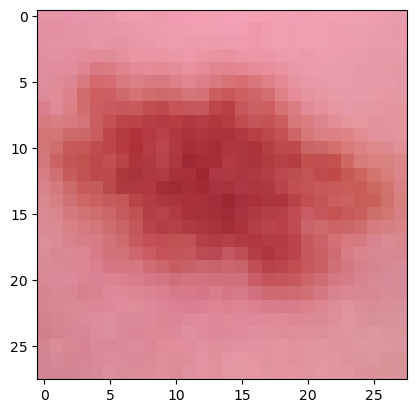

In [14]:
import matplotlib.pyplot as plt

def CheckImageAndMetadata(dataset, index):
    print(f"dataset.shape : {dataset.shape}")
    # 첫 번째 이미지 선택
    img = dataset[index][0:2352]
    first_image = img.reshape(28,28,3).astype('uint8')
    
    # 이미지 출력
    plt.imshow(first_image)
    plt.show()
    
    
CheckImageAndMetadata(X_train, 0)

In [15]:
X_train[:2352] = X_train[:2352].astype(np.float64)
X_train[:2352] /= 255.0

X_test[:2352] = X_test[:2352].astype(np.float64)
X_test[:2352] /= 255.0

print(f"X_train 데이터 타입:{X_train.dtype} \n 0번째의 shape:{X_train[0].shape} \n값:{X_train[0]}\n")
print(f"X_test 데이터 타입:{X_test.dtype} \n 0번째의 shape:{X_test[0].shape} \n값:{X_test[0]}")

X_train 데이터 타입:float64 
 0번째의 shape:(2371,) 
값:[0.89803922 0.58039216 0.65490196 ... 0.         0.         0.        ]

X_test 데이터 타입:float64 
 0번째의 shape:(2371,) 
값:[0.61960784 0.31372549 0.43137255 ... 0.         0.         0.        ]


In [39]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, concatenate, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# 이미지 입력 레이어
image_input = Input(shape=(28, 28, 3), name='image_input')
conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(image_input)
conv1 = BatchNormalization()(conv1)
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)  # 추가된 합성곱 층
conv2 = BatchNormalization()(conv2)
pool1 = MaxPooling2D((2, 2))(conv2)
conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)  # 추가된 합성곱 층
conv3 = BatchNormalization()(conv3)
conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)  # 추가된 합성곱 층
conv4 = BatchNormalization()(conv4)
pool3 = MaxPooling2D((2, 2))(conv4)
flatten1 = Flatten()(pool3)

# 나이 입력 레이어
age_input = Input(shape=(1,), name='age_input')

# 성별 입력 레이어 (One-Hot Encoding)
sex_input = Input(shape=(3,), name='sex_input')

# 발병위치 입력 레이어 (One-Hot Encoding)
localization_input = Input(shape=(15,), name='localization_input')

# 모든 입력을 결합하는 레이어
combined_input = concatenate([flatten1, age_input, sex_input, localization_input])

# Fully Connected Layer
dense1 = Dense(128, activation='relu')(combined_input)
dropout1 = Dropout(0.5)(dense1)
dense2 = Dense(64, activation='relu')(dropout1)
dropout2 = Dropout(0.5)(dense2)

# 출력 레이어 (다중 클래스 분류)
output = Dense(7, activation='softmax')(dropout2)  # 7가지 질병 클래스 중 하나 예측

# 모델 생성
model = Model(inputs=[image_input, age_input, sex_input, localization_input], outputs=output)

from keras.optimizers import Adam
Adam_custom = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999) # epsilon=None, amsgrad=False

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)      │ (None, 28, 28, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_16 (Conv2D)            │ (None, 28, 28, 16)        │             448 │ image_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_16        │ (None, 28, 28, 16)        │              64 │ conv2d_16[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_17 (Conv2D)            │ (None, 28, 28, 32)        │           4,640 │ batch_normalization_16[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_17        │ (None, 28, 28, 32)        │             128 │ conv2d_17[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_8               │ (None, 14, 14, 32)        │               0 │ batch_normalization_17[0]… │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_18 (Conv2D)            │ (None, 14, 14, 64)        │          18,496 │ max_pooling2d_8[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_18        │ (None, 14, 14, 64)        │             256 │ conv2d_18[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_19 (Conv2D)            │ (None, 14, 14, 128)       │          73,856 │ batch_normalization_18[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_19        │ (None, 14, 14, 128)       │             512 │ conv2d_19[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_9               │ (None, 7, 7, 128)         │               0 │ batch_normalization_19[0]… │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_4 (Flatten)           │ (None, 6272)              │               0 │ max_pooling2d_9[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ age_input (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sex_input (InputLayer)        │ (None, 3)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 912,487 (3.48 MB)

 Trainable params: 912,007 (3.48 MB)

 Non-trainable params: 480 (1.88 KB)

In [40]:
from tensorflow.keras.utils import to_categorical


# 이미지 데이터의 경우 0~2351 열까지는 이미지 데이터
X_train_image = X_train[:, :2352].reshape(-1, 28, 28, 3)

# 나이 데이터는 2352번째 열
X_train_age = X_train[:, 2352].reshape(-1, 1)

# 성별 데이터는 2353~2355번째 열 (One-Hot Encoding된 형태로 입력)
X_train_sex = X_train[:, 2353:2356]

# 발병위치 데이터는 2356~2369번째 열 (One-Hot Encoding된 형태로 입력)
X_train_localization = X_train[:, 2356:]

# y_train을 원-핫 인코딩
y_train_encoded = to_categorical(y_train, num_classes=7)

print(type(X_train_image))
print(type(X_train_age))
print(type(X_train_sex))
print(type(X_train_localization))
print(type(y_train_encoded))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [41]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# EarlyStopping 콜백 설정
# 검증 손실이 5 에포크 동안 개선되지 않으면 학습을 조기 종료
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='min', verbose=1)

# ReduceLROnPlateau 콜백 설정
# 검증 손실이 5 에포크 동안 개선되지 않으면 학습률을 50%로 줄임
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001, verbose=1)

# 모델을 훈련시킴
history = model.fit([X_train_image, X_train_age, X_train_sex, X_train_localization], y_train_encoded,
          epochs=50,
          batch_size=64,
          validation_split=0.2,
          callbacks=[reduce_lr]
         )


Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 23s 106ms/step - accuracy: 0.4801 - loss: 2.3628 - val_accuracy: 0.6737 - val_loss: 1.3954 - learning_rate: 0.0010
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.6485 - loss: 1.3043 - val_accuracy: 0.6719 - val_loss: 1.0851 - learning_rate: 0.0010
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.6624 - loss: 1.2137 - val_accuracy: 0.6725 - val_loss: 1.3388 - learning_rate: 0.0010
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.6670 - loss: 1.1358 - val_accuracy: 0.6719 - val_loss: 1.3566 - learning_rate: 0.0010
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.6572 - loss: 1.1189 - val_accuracy: 0.6719 - val_loss: 1.0120 - learning_rate: 0.0010
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.6694 - loss: 1.0787 - val_accuracy: 0.6719 - val_loss: 1.0348 - learning_rate: 0.0010
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.67

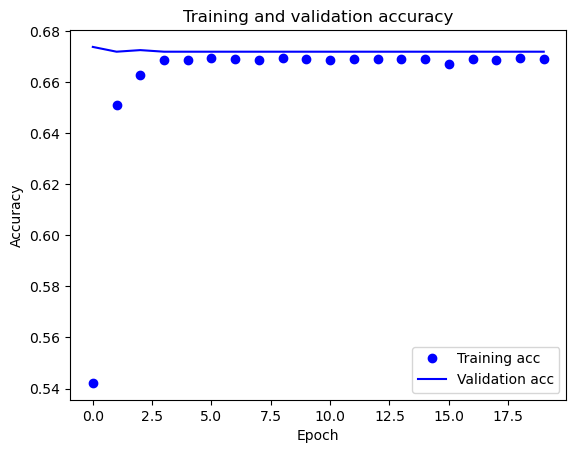

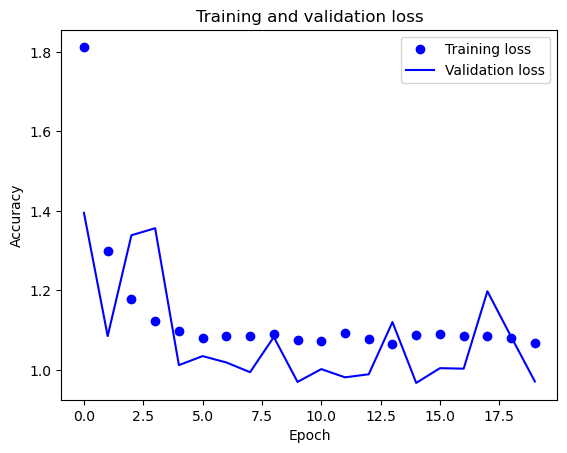

In [42]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [43]:
# 이미지 데이터의 경우 0~2351 열까지는 이미지 데이터
X_test_image = X_test[:, :2352].reshape(-1, 28, 28, 3)

# 나이 데이터는 2352번째 열
X_test_age = X_test[:, 2352].reshape(-1, 1)

# 성별 데이터는 2353~2355번째 열 (One-Hot Encoding된 형태로 입력)
X_test_sex = X_test[:, 2353:2356]

# 발병위치 데이터는 2356~2369번째 열 (One-Hot Encoding된 형태로 입력)
X_test_localization = X_test[:, 2356:]

# y_train을 원-핫 인코딩
y_test_encoded = to_categorical(y_test, num_classes=7)


#predictions = model.predict([X_test_image, X_test_age, X_test_sex, X_test_localization])
#print(predictions)
loss, accuracy = model.evaluate([X_test_image, X_test_age, X_test_sex, X_test_localization], y_test_encoded)

print("테스트 세트 손실:", loss)
print("테스트 세트 정확도:", accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6458 - loss: 1.1928
테스트 세트 손실: 1.1471688747406006
테스트 세트 정확도: 0.6679980158805847


In [38]:
테스트 세트 손실: 1.0505026578903198
테스트 세트 정확도: 0.6984522938728333

SyntaxError: invalid syntax (3418129679.py, line 1)

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, ['0','1','2','3','4','5','6'], normalize='true')
plt.figure(figsize = (10,7))
sns.heatmap(cf_matrix, annot=False, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=False)
plt.title('Normalized Confusion Matrix', fontsize = 23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [2003, 7]